<a href="https://colab.research.google.com/github/ankesh86/PySparkNotebooks/blob/main/MoviesDataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317122 sha256=96afdf169ebd3213ca0f6fef10a75f5aebf57fc3b6dbda3acaecf477341ade94
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Data_Wrangling").getOrCreate()

In [3]:
#reading data from file
file_loc = "sample_data/movie_data_part1.csv"
file_typ = "csv"
infer_Schema = "False"
first_row_is_header = "True"
delimiter = "|"

In [4]:
df = spark.read.format(file_typ).option("inferSchema",infer_Schema).option("header",first_row_is_header).option("sep",delimiter).load(file_loc)

In [5]:
df.printSchema()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)



In [6]:
df.dtypes

[('belongs_to_collection', 'string'),
 ('budget', 'string'),
 ('id', 'string'),
 ('original_language', 'string'),
 ('original_title', 'string'),
 ('overview', 'string'),
 ('popularity', 'string'),
 ('production_companies', 'string'),
 ('production_countries', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('runtime', 'string'),
 ('status', 'string'),
 ('tagline', 'string'),
 ('title', 'string'),
 ('vote_average', 'string')]

In [7]:
df.count()

43998

In [8]:
select_col = ["id","budget","popularity","release_date","revenue","title"]
df = df.select(*select_col)
df.show()

+-----+-------+------------------+------------+-------+--------------------+
|   id| budget|        popularity|release_date|revenue|               title|
+-----+-------+------------------+------------+-------+--------------------+
|43000|      0|             2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|      0|              5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|      0|              5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|      0|             7.159|  1975-03-12|      0|          F for Fake|
|43004| 500000|             3.988|  1962-10-09|      0|Long Day's Journe...|
|43006|      0|             3.194|  1962-03-09|      0|           My Geisha|
|43007|      0|             2.689|  1962-10-31|      0|Period of Adjustment|
|43008|      0|             6.537|  1959-03-13|      0|    The Hanging Tree|
|43010|      0|             4.297|  1962-01-01|      0|Sherlock Holmes a...|
|43011|      0|             4.417|  1962-01-01|      0|  Sodom and Gomorrah|

In [9]:
# missing values
from pyspark.sql.functions import *
df.filter((df['popularity']=='')|(df['popularity'].isNull())|isnan(df['popularity'])).count()

215

In [10]:
# all null values
df.select([count(when((col(c)=='') | col(c).isNull() |isnan(c), c)).alias(c) for c in df.columns]).show()

+---+------+----------+------------+-------+-----+
| id|budget|popularity|release_date|revenue|title|
+---+------+----------+------------+-------+-----+
|125|   125|       215|         221|    215|  304|
+---+------+----------+------------+-------+-----+



### count/ frequesncies

In [11]:
df.groupBy(df['title']).count().show()

+--------------------+-----+
|               title|count|
+--------------------+-----+
|   The Corn Is Green|    1|
|Meet The Browns -...|    1|
|Morenita, El Esca...|    1|
| Father Takes a Wife|    1|
|The Werewolf of W...|    1|
|My Wife Is a Gang...|    1|
|Depeche Mode: Tou...|    1|
|  A Woman Is a Woman|    1|
|History Is Made a...|    1|
|      Colombian Love|    1|
|        Ace Attorney|    1|
|     Not Like Others|    1|
|40 Guns to Apache...|    1|
|          Middle Men|    1|
|         It's a Gift|    1|
|    La Vie de Bohème|    1|
|Rasputin: The Mad...|    1|
|The Ballad of Jac...|    1|
|         How to Deal|    1|
|             Freaked|    1|
+--------------------+-----+
only showing top 20 rows



In [12]:
df.groupBy(df['title']).count().sort(desc("count")).show(10,False)

+--------------------+-----+
|title               |count|
+--------------------+-----+
|null                |304  |
|Les Misérables      |8    |
|The Three Musketeers|8    |
|Cinderella          |8    |
|A Christmas Carol   |7    |
|The Island          |7    |
|Dracula             |7    |
|Hamlet              |7    |
|Frankenstein        |7    |
|Cleopatra           |6    |
+--------------------+-----+
only showing top 10 rows



Sorting and filter

In [13]:
df_temp = df.filter((df["title"]!='') & (df['title'].isNotNull()) & (~isnan(df['title'])))

df_temp.groupby(df_temp['title']).count().filter("`count` > 4").sort(col("count").desc()).show(10,False)

+--------------------+-----+
|title               |count|
+--------------------+-----+
|Les Misérables      |8    |
|The Three Musketeers|8    |
|Cinderella          |8    |
|A Christmas Carol   |7    |
|The Island          |7    |
|Frankenstein        |7    |
|Dracula             |7    |
|Hamlet              |7    |
|Treasure Island     |6    |
|The Lost World      |6    |
+--------------------+-----+
only showing top 10 rows



In [14]:
df_temp.groupby(df_temp['title']).count().filter("`count`>4").sort(col("count").desc()).count()

43

In [15]:
del df_temp

## Casting Variables

In [16]:
#before casting
df.dtypes

[('id', 'string'),
 ('budget', 'string'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

In [17]:
#casting
df = df.withColumn('budget',df['budget'].cast("float"))
df.dtypes

[('id', 'string'),
 ('budget', 'float'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

In [18]:
# importing necessary libraries
from pyspark.sql.types import *

int_vars = ['id']
float_vars = ['budget','popularity','revenue']
date_vars = ['release_date']

#converting integer variables
for column in int_vars:
  df = df.withColumn(column, df[column].cast(IntegerType()))
for column in float_vars:
  df = df.withColumn(column, df[column].cast(FloatType()))
for column in date_vars:
  df = df.withColumn(column, df[column].cast(DateType()))

df.dtypes

[('id', 'int'),
 ('budget', 'float'),
 ('popularity', 'float'),
 ('release_date', 'date'),
 ('revenue', 'float'),
 ('title', 'string')]

In [19]:
df.show()

+-----+---------+----------+------------+---------+--------------------+
|   id|   budget|popularity|release_date|  revenue|               title|
+-----+---------+----------+------------+---------+--------------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|
|43008|      0.0|     6.537|  1959-03-13|      0.0|    The Hanging Tree|
|43010|      0.0|     4.297|  1962-01-01|      0.0|Sherlock Holmes a...|
|43011|      0.0|     4.417|  1962-01-01|      0.0|  Sodom and Gomorrah|
|43012|7000000.0|     4.722|  1962-11-21|4000000.0|

## Descriptive Statistics

In [20]:
df.describe().show()

+-------+------------------+--------------------+------------------+-------------------+--------------------+
|summary|                id|              budget|        popularity|            revenue|               title|
+-------+------------------+--------------------+------------------+-------------------+--------------------+
|  count|             43784|               43873|             43783|              43783|               43694|
|   mean|44502.304312077475|  3736901.8349631676| 5.295444259579189|  9697079.597382545|            Infinity|
| stddev|  27189.6465886264|1.5871814952777285E7|6.1680305192082665|5.687938449628816E7|                 NaN|
|    min|                 2|                 0.0|               0.6|                0.0|!Women Art Revolu...|
|    max|            100988|               3.8E8|             180.0|       2.78796518E9|       시크릿 Secret|
+-------+------------------+--------------------+------------------+-------------------+--------------------+



In [21]:
# Median Calculation
df_temp = df.filter((df['budget']!=0)&(df['budget'].isNotNull()) & (~isnan(df['budget'])))
median=df_temp.approxQuantile('budget',[0.5],0.001)
print ('The median of budget is '+str(median))

The median of budget is [7000000.0]


## unique/ distinct values and counts

In [22]:
#dist occ of titles
df.agg(countDistinct(col("title")).alias("count")).show()

+-----+
|count|
+-----+
|41138|
+-----+



In [23]:
#dist occ. of titles
df.select('title').distinct().show(10,False)

+---------------------------------------------+
|title                                        |
+---------------------------------------------+
|The Corn Is Green                            |
|Meet The Browns - The Play                   |
|Morenita, El Escandalo                       |
|Father Takes a Wife                          |
|The Werewolf of Washington                   |
|My Wife Is a Gangster                        |
|Depeche Mode: Touring the Angel Live in Milan|
|A Woman Is a Woman                           |
|History Is Made at Night                     |
|Colombian Love                               |
+---------------------------------------------+
only showing top 10 rows



In [24]:
#year from release data

df_temp = df.withColumn('release_year', year('release_date'))

df_temp = df_temp.withColumn('release_month', month('release_date'))
df_temp = df_temp.withColumn('release_day', dayofmonth('release_date'))

df_temp.show()

+-----+---------+----------+------------+---------+--------------------+------------+-------------+-----------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|release_month|release_day|
+-----+---------+----------+------------+---------+--------------------+------------+-------------+-----------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|            5|         23|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|           11|         12|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|            5|         24|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|            3|         12|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|           10|          9|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|            3|     

In [25]:
df_temp.groupBy("release_year").agg(countDistinct("title")).show(10,False)

+------------+------------+
|release_year|count(title)|
+------------+------------+
|1959        |271         |
|1990        |496         |
|1975        |365         |
|1977        |415         |
|1924        |19          |
|2003        |1199        |
|2007        |1896        |
|2018        |4           |
|1974        |434         |
|2015        |13          |
+------------+------------+
only showing top 10 rows



## Filter

In [26]:
df.filter(df['title'].like('Meet%')).show(10,False)

+-----+---------+----------+------------+-----------+--------------------------+
|id   |budget   |popularity|release_date|revenue    |title                     |
+-----+---------+----------+------------+-----------+--------------------------+
|43957|500000.0 |2.649     |2005-06-28  |1000000.0  |Meet The Browns - The Play|
|39997|0.0      |3.585     |1989-11-15  |0.0        |Meet the Hollowheads      |
|16710|0.0      |11.495    |2008-03-21  |4.1939392E7|Meet the Browns           |
|20430|0.0      |3.614     |2004-01-29  |0.0        |Meet Market               |
|76435|0.0      |1.775     |2011-03-31  |0.0        |Meet the In-Laws          |
|76516|5000000.0|4.05      |1990-11-08  |485772.0   |Meet the Applegates       |
|7278 |3.0E7    |11.116    |2008-01-24  |8.4646832E7|Meet the Spartans         |
|32574|0.0      |7.42      |1941-03-14  |0.0        |Meet John Doe             |
|40506|0.0      |4.814     |1997-01-31  |0.0        |Meet Wally Sparks         |
|40688|2.4E7    |6.848     |

In [27]:
# do not end with s
df.filter(~df['title'].like('%s')).show(10,False)

+-----+--------+----------+------------+-------+---------------------------------------+
|id   |budget  |popularity|release_date|revenue|title                                  |
+-----+--------+----------+------------+-------+---------------------------------------+
|43000|0.0     |2.503     |1962-05-23  |0.0    |The Elusive Corporal                   |
|43001|0.0     |5.51      |1962-11-12  |0.0    |Sundays and Cybele                     |
|43002|0.0     |5.62      |1962-05-24  |0.0    |Lonely Are the Brave                   |
|43003|0.0     |7.159     |1975-03-12  |0.0    |F for Fake                             |
|43004|500000.0|3.988     |1962-10-09  |0.0    |Long Day's Journey Into Night          |
|43006|0.0     |3.194     |1962-03-09  |0.0    |My Geisha                              |
|43007|0.0     |2.689     |1962-10-31  |0.0    |Period of Adjustment                   |
|43008|0.0     |6.537     |1959-03-13  |0.0    |The Hanging Tree                       |
|43010|0.0     |4.297

In [28]:
# regex
df.filter(df['title'].rlike('\w*ove')).show(10,False)

+-----+------+----------+------------+------------+------------------------+
|id   |budget|popularity|release_date|revenue     |title                   |
+-----+------+----------+------------+------------+------------------------+
|43100|0.0   |7.252     |1959-10-07  |0.0         |General Della Rovere    |
|43152|0.0   |5.126     |2001-06-21  |0.0         |Love on a Diet          |
|43191|0.0   |4.921     |1952-08-29  |0.0         |Beware, My Lovely       |
|43281|0.0   |2.411     |1989-11-22  |0.0         |Love Without Pity       |
|43343|0.0   |3.174     |1953-12-25  |0.0         |Easy to Love            |
|43347|3.0E7 |14.863    |2010-11-22  |1.02820008E8|Love & Other Drugs      |
|43362|0.0   |1.705     |1952-02-23  |0.0         |Love Is Better Than Ever|
|43363|0.0   |2.02      |1952-05-29  |0.0         |Lovely to Look At       |
|43395|0.0   |4.758     |1950-11-10  |0.0         |Two Weeks with Love     |
|43455|0.0   |4.669     |1948-08-23  |0.0         |The Loves of Carmen     |

In [29]:
df.filter(df.title.contains('ove')).show(10,False)

+-----+------+----------+------------+------------+------------------------+
|id   |budget|popularity|release_date|revenue     |title                   |
+-----+------+----------+------------+------------+------------------------+
|43100|0.0   |7.252     |1959-10-07  |0.0         |General Della Rovere    |
|43152|0.0   |5.126     |2001-06-21  |0.0         |Love on a Diet          |
|43191|0.0   |4.921     |1952-08-29  |0.0         |Beware, My Lovely       |
|43281|0.0   |2.411     |1989-11-22  |0.0         |Love Without Pity       |
|43343|0.0   |3.174     |1953-12-25  |0.0         |Easy to Love            |
|43347|3.0E7 |14.863    |2010-11-22  |1.02820008E8|Love & Other Drugs      |
|43362|0.0   |1.705     |1952-02-23  |0.0         |Love Is Better Than Ever|
|43363|0.0   |2.02      |1952-05-29  |0.0         |Lovely to Look At       |
|43395|0.0   |4.758     |1950-11-10  |0.0         |Two Weeks with Love     |
|43455|0.0   |4.669     |1948-08-23  |0.0         |The Loves of Carmen     |

columns variable name filtering

In [30]:
df.select(df.colRegex("`re\w*`")).printSchema()

root
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)



In [31]:
df.select(df.colRegex("`\w*e`")).printSchema()

root
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)



## Creating new columns

In [32]:
mean_pop = df.agg({'popularity': 'mean'}).collect()[0]['avg(popularity)']
count_obs = df.count()

df = df.withColumn('mean_popularity', lit(mean_pop))

In [33]:
df = df.withColumn('variance', pow((df['popularity'] - df['mean_popularity']), 2))

variance_sum = df.agg({'variance': 'sum'}).collect()[0]['sum(variance)']

variance_population = variance_sum/(count_obs-1)

In [34]:
variance_population

37.858688057663116

# UDF

In [35]:
def new_cols(budget, popularity):
  if budget<10000000: budget_cat = 'Small'
  elif budget<100000000: budget_cat = 'Medium'
  else: budget_cat = 'Big'
  if popularity<3: ratings='Low'
  elif popularity<5: ratings='Mid'
  else: ratings='High'
  return budget_cat, ratings

In [36]:
#apply udf on df
udfB = udf(new_cols, StructType([StructField("budget_cat", StringType(),True), StructField("ratings", StringType(), True)]))

temp_df = df.select('id','budget','popularity').withColumn("newcat",udfB("budget","popularity"))

df_with_newcols = temp_df.select('id','budget','popularity','newcat').withColumn('budget_cat',temp_df.newcat.getItem('budget_cat')).withColumn('ratings',temp_df.newcat.getItem('ratings')).drop('newcat')

df_with_newcols.show(15,False)

+-----+---------+----------+----------+-------+
|id   |budget   |popularity|budget_cat|ratings|
+-----+---------+----------+----------+-------+
|43000|0.0      |2.503     |Small     |Low    |
|43001|0.0      |5.51      |Small     |High   |
|43002|0.0      |5.62      |Small     |High   |
|43003|0.0      |7.159     |Small     |High   |
|43004|500000.0 |3.988     |Small     |Mid    |
|43006|0.0      |3.194     |Small     |Mid    |
|43007|0.0      |2.689     |Small     |Low    |
|43008|0.0      |6.537     |Small     |High   |
|43010|0.0      |4.297     |Small     |Mid    |
|43011|0.0      |4.417     |Small     |Mid    |
|43012|7000000.0|4.722     |Small     |Mid    |
|43013|0.0      |2.543     |Small     |Low    |
|43014|0.0      |4.303     |Small     |Mid    |
|43015|0.0      |3.493     |Small     |Mid    |
|43016|0.0      |2.851     |Small     |Low    |
+-----+---------+----------+----------+-------+
only showing top 15 rows



In [37]:
#  New Columns - Method 3
df_with_newcols = df.select('id','budget','popularity').\
withColumn('budget_cat', when(df['budget']<10000000,'Small').when(df['budget']<100000000,'Medium').otherwise('Big')).\
withColumn('ratings', when(df['popularity']<3,'Low').when(df['popularity']<5,'Mid').otherwise('High'))

## dropping and renaming columns

In [38]:
col_to_drop = ['budget_cat']
df_with_newcols = df_with_newcols.drop(*col_to_drop)

In [39]:
df_with_newcols.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- ratings: string (nullable = false)



In [40]:
df_with_newcols = df_with_newcols.withColumnRenamed('id','film_id').withColumnRenamed('ratings','film_ratings')

In [41]:
df_with_newcols.printSchema()

root
 |-- film_id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- film_ratings: string (nullable = false)



In [42]:

new_names = [('budget','film_budget'),('popularity','film_popularity')]

# Applying the alias function
df_with_newcols_renamed = df_with_newcols.select(list(map(lambda old,new:col(old).alias(new),*zip(*new_names))))

In [43]:
df_with_newcols_renamed.printSchema()

root
 |-- film_budget: float (nullable = true)
 |-- film_popularity: float (nullable = true)



## String Functions

In [44]:
df_with_newcols = df.select('id','budget','popularity').\
            withColumn('budget_cat', when(df['budget']<10000000,'Small').\
           when(df['budget']<100000000,'Medium').otherwise('Big')).\
           withColumn('ratings',when(df['popularity']<3,'Low').\
                      when(df['popularity']<5,'Mid').otherwise('High'))

In [45]:
df_with_newcols.show()

+-----+---------+----------+----------+-------+
|   id|   budget|popularity|budget_cat|ratings|
+-----+---------+----------+----------+-------+
|43000|      0.0|     2.503|     Small|    Low|
|43001|      0.0|      5.51|     Small|   High|
|43002|      0.0|      5.62|     Small|   High|
|43003|      0.0|     7.159|     Small|   High|
|43004| 500000.0|     3.988|     Small|    Mid|
|43006|      0.0|     3.194|     Small|    Mid|
|43007|      0.0|     2.689|     Small|    Low|
|43008|      0.0|     6.537|     Small|   High|
|43010|      0.0|     4.297|     Small|    Mid|
|43011|      0.0|     4.417|     Small|    Mid|
|43012|7000000.0|     4.722|     Small|    Mid|
|43013|      0.0|     2.543|     Small|    Low|
|43014|      0.0|     4.303|     Small|    Mid|
|43015|      0.0|     3.493|     Small|    Mid|
|43016|      0.0|     2.851|     Small|    Low|
|43017|      0.0|     4.047|     Small|    Mid|
|43018|      0.0|     2.661|     Small|    Low|
|43019|      0.0|     3.225|     Small| 

In [46]:
#concating two variables
df_with_newcols = df_with_newcols.withColumn('BudgetRating_Category',concat(df_with_newcols.budget_cat,df_with_newcols.ratings))

In [47]:
#variable to lowercase
df_with_newcols = df_with_newcols.withColumn('BudgetRating_Category', trim(lower(df_with_newcols.BudgetRating_Category)))

df_with_newcols.show()

+-----+---------+----------+----------+-------+---------------------+
|   id|   budget|popularity|budget_cat|ratings|BudgetRating_Category|
+-----+---------+----------+----------+-------+---------------------+
|43000|      0.0|     2.503|     Small|    Low|             smalllow|
|43001|      0.0|      5.51|     Small|   High|            smallhigh|
|43002|      0.0|      5.62|     Small|   High|            smallhigh|
|43003|      0.0|     7.159|     Small|   High|            smallhigh|
|43004| 500000.0|     3.988|     Small|    Mid|             smallmid|
|43006|      0.0|     3.194|     Small|    Mid|             smallmid|
|43007|      0.0|     2.689|     Small|    Low|             smalllow|
|43008|      0.0|     6.537|     Small|   High|            smallhigh|
|43010|      0.0|     4.297|     Small|    Mid|             smallmid|
|43011|      0.0|     4.417|     Small|    Mid|             smallmid|
|43012|7000000.0|     4.722|     Small|    Mid|             smallmid|
|43013|      0.0|   

# **Registering dataframes**

In [48]:
# Registering temporary table
df_with_newcols.registerTempTable('temp_data')

# Showing the results
spark.sql('select ratings, count(ratings) as ratings_count from temp_data group by ratings').show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:330: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+-------+-------------+
|ratings|ratings_count|
+-------+-------------+
|   High|        16856|
|    Low|        14865|
|    Mid|        12277|
+-------+-------------+



## **Window Functions**
### Ranking
* rank
* denseRank
* rowNumber
* ntile

### Analytical
* lead
* lag
* lastvalue
* firstValue
* cumeDist

In [49]:
from pyspark.sql.window import *

#Step 1 : filter missing value
df_with_newcols = df_with_newcols.filter((df_with_newcols['popularity'].isNotNull()) & (~isnan(df_with_newcols['popularity'])))

#Step 2
df_with_newcols = df_with_newcols.select("id","budget","popularity",ntile(10).over(Window.partitionBy().orderBy(df_with_newcols['popularity'].desc())).alias("decile_rank"))
#df_with_newcols = df_with_newcols.select("id","budget","popularity", ntile(10).over(Window.partitionBy().orderBy(df_with_newcols['popularity'].desc())).alias("decile_rank"))

df_with_newcols.groupby("decile_rank").agg(min('popularity').alias('min_popularity'),max('popularity').alias('max_popularity'),count('popularity')).show()

+-----------+--------------+--------------+-----------------+
|decile_rank|min_popularity|max_popularity|count(popularity)|
+-----------+--------------+--------------+-----------------+
|          1|        10.185|         180.0|             4379|
|          2|         7.481|        10.182|             4379|
|          3|         5.841|         7.481|             4379|
|          4|         4.823|         5.841|             4378|
|          5|         4.054|         4.822|             4378|
|          6|         3.383|         4.054|             4378|
|          7|         2.747|         3.383|             4378|
|          8|         2.075|         2.747|             4378|
|          9|         1.389|         2.075|             4378|
|         10|           0.6|         1.389|             4378|
+-----------+--------------+--------------+-----------------+



In [51]:
from pyspark.sql.window import *
df_second_best = df.select('id','popularity','release_date')

df_second_best = df_second_best.withColumn('release_year', year('release_date')).drop('release_date')

year_window = Window.partitionBy(df_second_best['release_year']).orderBy(df_with_newcols['popularity'].desc())

df_second_best = df_second_best.select('id','popularity','release_year', rank().over(year_window).alias("rank"))

df_second_best.filter((df_second_best['release_year']==1970) & (df_second_best['rank']==2)).show()

+-----+----------+------------+----+
|   id|popularity|release_year|rank|
+-----+----------+------------+----+
|11202|    14.029|        1970|   2|
+-----+----------+------------+----+



In [56]:
# Revenue Difference

df_revenue = df.select('id', 'revenue', 'release_date')
df_revenue=df_revenue.withColumn('release_year',year('release_date')).drop('release_date')

windowRev =Window.partitionBy(df_revenue['release_year']).orderBy(df_revenue['revenue'].desc()).rangeBetween(-sys.maxsize, sys.maxsize)

revenue_difference = (max(df_revenue['revenue']).over(windowRev) - df_revenue['revenue'])
df_revenue.select('id', 'revenue', 'release_year',revenue_difference.alias("revenue_difference")).show(20,False)


+----+-------+------------+------------------+
|id  |revenue|release_year|revenue_difference|
+----+-------+------------+------------------+
|null|10.0   |null        |0.0               |
|null|10.0   |null        |0.0               |
|null|10.0   |null        |0.0               |
|null|8.7    |null        |1.3000002         |
|null|8.1    |null        |1.8999996         |
|null|8.0    |null        |2.0               |
|null|8.0    |null        |2.0               |
|null|7.9    |null        |2.1               |
|null|7.8    |null        |2.1999998         |
|null|7.7    |null        |2.3000002         |
|null|7.6    |null        |2.4               |
|null|7.6    |null        |2.4               |
|null|7.4    |null        |2.6               |
|null|7.4    |null        |2.6               |
|null|7.3    |null        |2.6999998         |
|null|7.3    |null        |2.6999998         |
|null|7.1    |null        |2.9               |
|null|7.1    |null        |2.9               |
|null|7.1    

In [57]:
# Collect list demonstration
# Step 1:Create the year column from release date
df=df.withColumn('release_year',year('release_date'))
# Applying collect list function to gather all occurances
df.filter("title=='The Lost World'").groupby('title').agg(collect_list("release_year")).show(1,False)

+--------------+------------------------------------+
|title         |collect_list(release_year)          |
+--------------+------------------------------------+
|The Lost World|[1999, 2001, 1925, 1960, 1992, 1998]|
+--------------+------------------------------------+



In [58]:
#sampling

#without replacement
df_sample = df.sample(False, 0.4,11) #(replacement, fraction, seed)
df_sample.count()

17722

In [59]:
#with replacement
df_sample = df.sample(True, 0.4,11) #(replacement, fraction, seed)
df_sample.count()

17432

In [60]:
# Stratified sampling in pyspark
df_strat = df.sampleBy("release_year", fractions={1959: 0.2, 1960: 0.4, 1961: 0.4}, seed=11)
df_strat.count()

269

In [61]:
df.show()

+-----+---------+----------+------------+---------+--------------------+-----------------+--------------------+------------+
|   id|   budget|popularity|release_date|  revenue|               title|  mean_popularity|            variance|release_year|
+-----+---------+----------+------------+---------+--------------------+-----------------+--------------------+------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|5.295444259579189|   7.797744825681142|        1962|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|5.295444259579189|0.046034263963398346|        1962|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|5.295444259579189| 0.10533635435520017|        1962|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|5.295444259579189|  3.4728396990815216|        1975|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|5.295444259579189|   1.709410711356759|        1962|


In [62]:
# Coalesce Demonstration
df.coalesce(1).write.format('csv').option('delimiter', '|').save('output_df1')

In [63]:
# PartitionBy Demonstration
df.write.partitionBy('release_year').format('csv').option('delimiter', '|').save('output_df_partitioned')

In [64]:
# SaveAs Demonstration
df.write.saveAsTable('film_ratings')

# **Pandas Support**

In [68]:
# Pyspark to Pandas
df_pandas=df.toPandas()

In [69]:
# Pandas to PySpark
df_py = spark.createDataFrame(df_pandas)

## **joins**

In [70]:
# input parameters
file_location = "sample_data/movie_data_part2_v1.csv"
file_type = 'csv'
infer_schema = "False"
first_row_is_header = "True"
delimiter = "|"


# Bringing all the options together to read the csv file

df_p1 = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.option("header", first_row_is_header) \
.option("sep", delimiter) \
.load(file_location)

In [72]:
# Schema of new dataset
df_p1.printSchema()

root
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: string (nullable = true)
 |-- id: string (nullable = true)



In [73]:
# cast identifier
df_p1 = df_p1.withColumn('id', df_p1['id'].cast("integer"))

df_p1 = df_p1.filter((df_p1['id'].isNotNull()) & (~isnan(df_p1['id'])))

In [75]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = false)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)



## Innrer join

In [77]:
# Inner Join
df.join(df_p1, df['id'] == df_p1['id'],'inner').printSchema()
df.join(df_p1, df['id'] == df_p1['id']).count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = false)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: string (nullable = true)
 |-- id: integer (nullable = true)



24998

In [78]:
# Left Join
df.join(df_p1, df['id'] == df_p1['id'],'left').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'left').count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = false)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: string (nullable = true)
 |-- id: integer (nullable = true)



43998

In [79]:
# Right Join
df.join(df_p1, df['id'] == df_p1['id'],'right').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'right').count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = true)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: string (nullable = true)
 |-- id: integer (nullable = true)



24998

In [80]:
# Outer Join
df.join(df_p1, df['id'] == df_p1['id'],'outer').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'outer').count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = true)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: string (nullable = true)
 |-- id: integer (nullable = true)



43998

In [81]:
# Left Anti Join
df.join(df_p1, df['id'] == df_p1['id'],'left_anti').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'left_anti').count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = false)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)



19000

In [82]:
# Left Semi Join
df.join(df_p1, df['id'] == df_p1['id'],'left_semi').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'left_semi').count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = false)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)



24998

In [83]:
# Broadcast Join
df.join(broadcast(df_p1), df['id'] == df_p1['id'],'left_semi').count()

24998

In [84]:
# Original data count
df.count()

43998

In [85]:
# Drop Duplicates Demonstration
df.dropDuplicates(['title','release_year']).count()

43643

# **Data Visualization**

In [90]:
# Step 1 : Importing required libraies

%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Processing the data in Spark. We can use the histogram function from the RDD
histogram_data = df.select('popularity').rdd.flatMap(lambda x: x).histogram(25)
# Loading the Computed Histogram into a Pandas Dataframe for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])



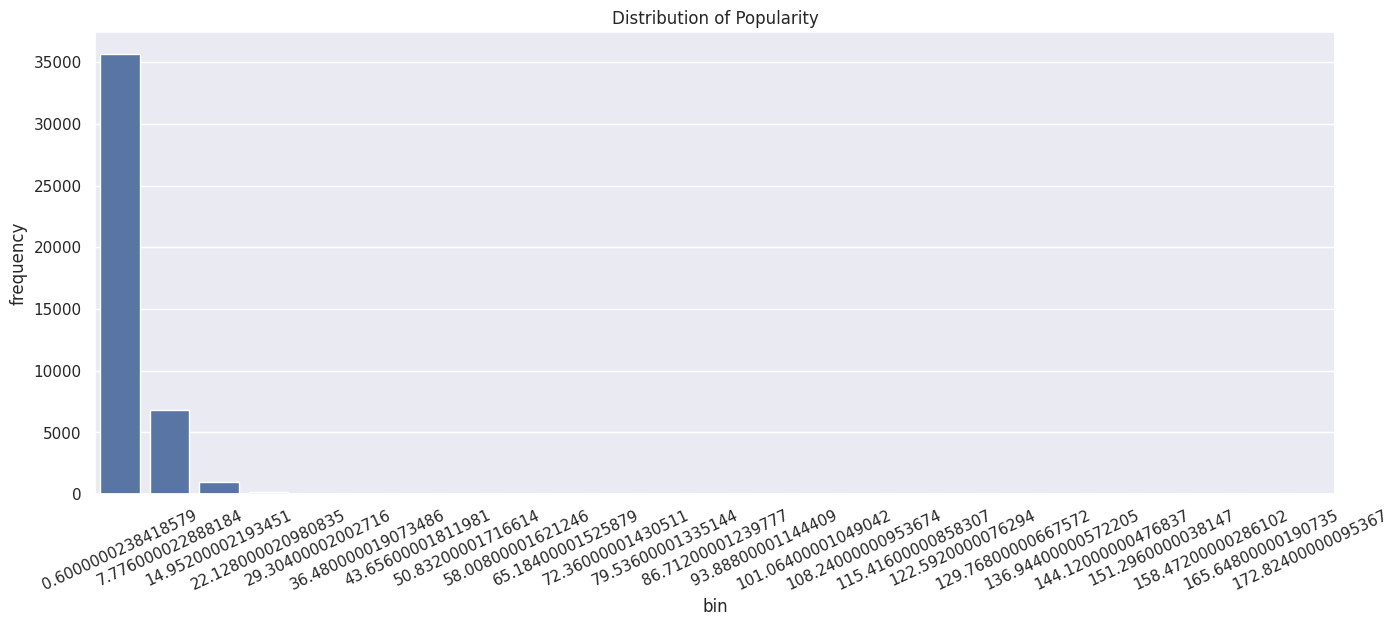

In [93]:
# Plotting
sns.set(rc={'figure.figsize':(16, 6)})
sns.barplot(x='bin', y='frequency', data=hist_df)  # Corrected line: specify x and y as keyword arguments
plt.xticks(rotation=25)
plt.title('Distribution of Popularity')
plt.show()
# plt.savefig('myimage.svg', format='svg', dpi=1200)

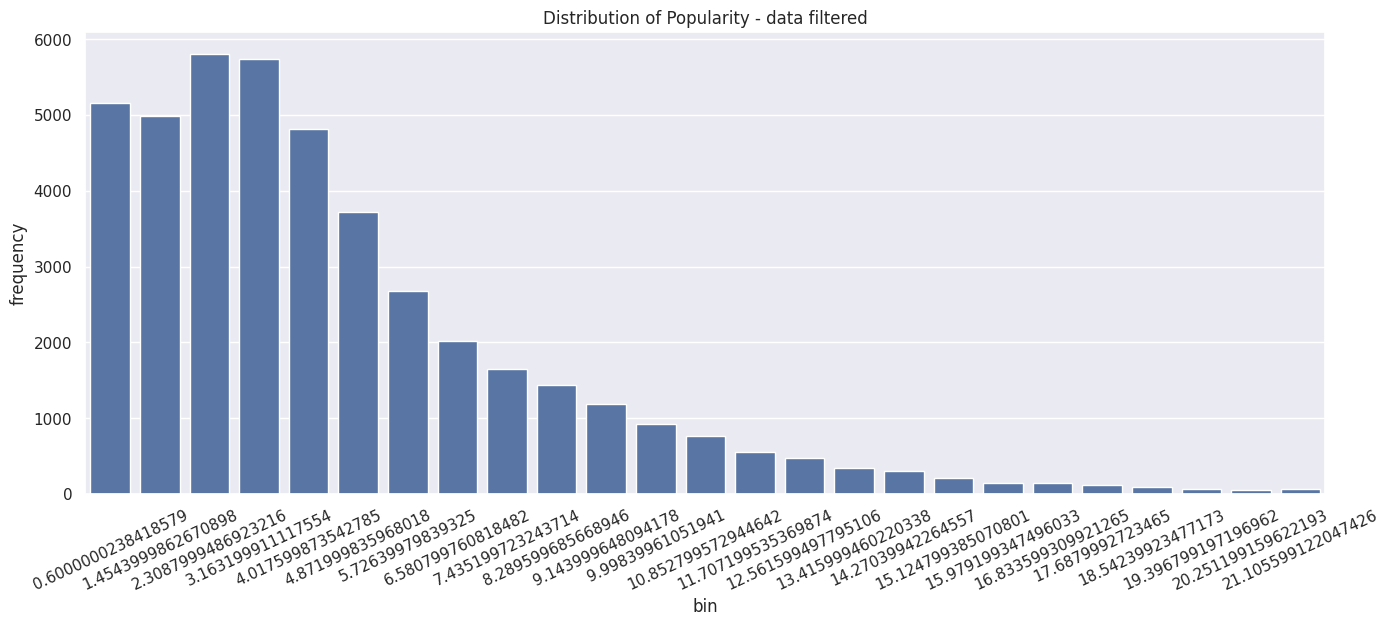

In [94]:
#filtering the data
df_fil = df.filter('popularity<22')

#processing data
# Processing the data in Spark. We can use the histogram function from the RDD
histogram_data = df_fil.select('popularity').rdd.flatMap(lambda x: x).histogram(25)
# Loading the Computed Histogram into a Pandas Dataframe for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])

# Plotting
sns.set(rc={'figure.figsize':(16, 6)})
sns.barplot(x='bin', y='frequency', data=hist_df)  # Corrected line: specify x and y as keyword arguments
plt.xticks(rotation=25)
plt.title('Distribution of Popularity - data filtered')
plt.show()

In [95]:
# Data preparation for bar chart
df_cat=df.filter("(release_year>1959) and (release_year<1971)").groupby('release_year').count().toPandas()
df_cat=df_cat.sort_values(by=['release_year'], ascending=False)

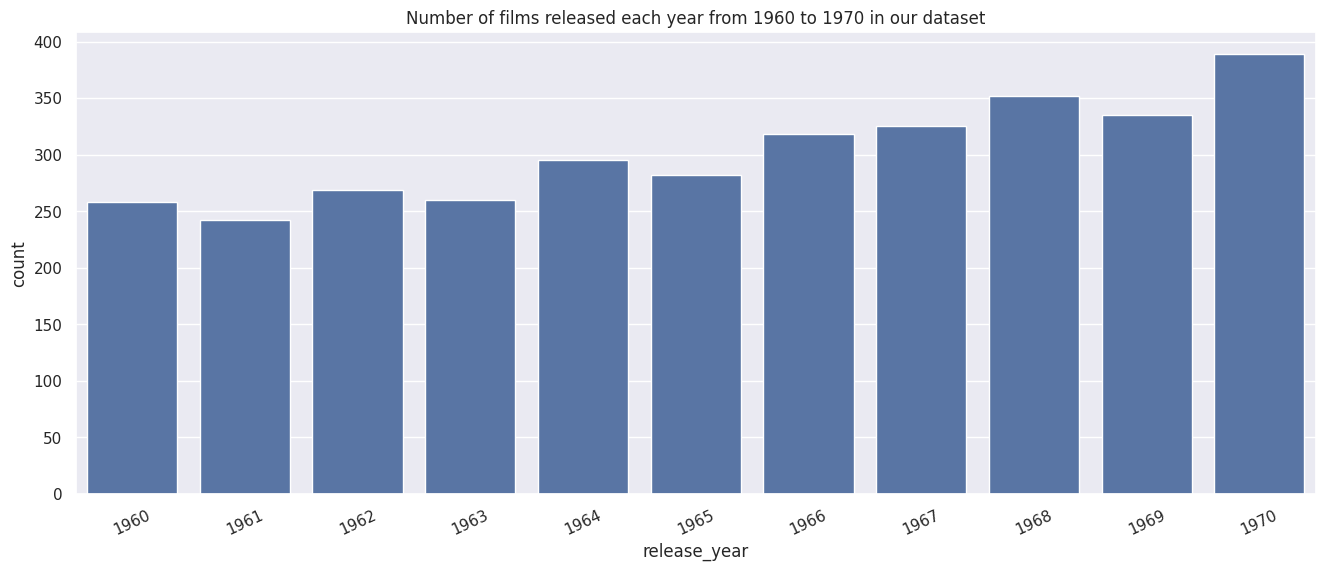

In [96]:
# Plotting
sns.set(rc={'figure.figsize':(16, 6)})
sns.barplot(x='release_year', y='count', data=df_cat)  # Corrected line: specify x and y as keyword arguments
plt.xticks(rotation=25)
plt.title('Number of films released each year from 1960 to 1970 in our dataset')
plt.show()
